# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"I:\Forage\British Airways Data Science\Task 2\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Step 1: Data Exploration and Visualization

## 1. Install Required Libraries

Before we start, make sure to install the necessary libraries if you don't have them already.

```bash
pip install pandas matplotlib seaborn


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


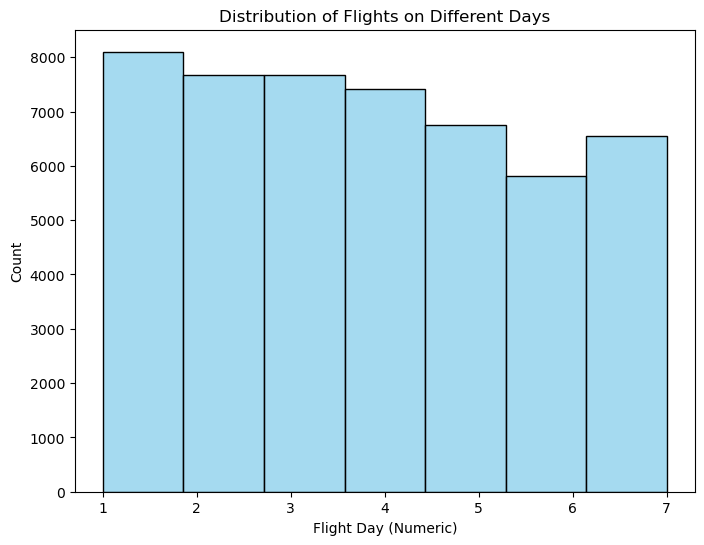

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df["flight_day"], bins=7, kde=False, color='skyblue')
plt.xlabel("Flight Day (Numeric)")
plt.ylabel("Count")
plt.title("Distribution of Flights on Different Days")
plt.show()


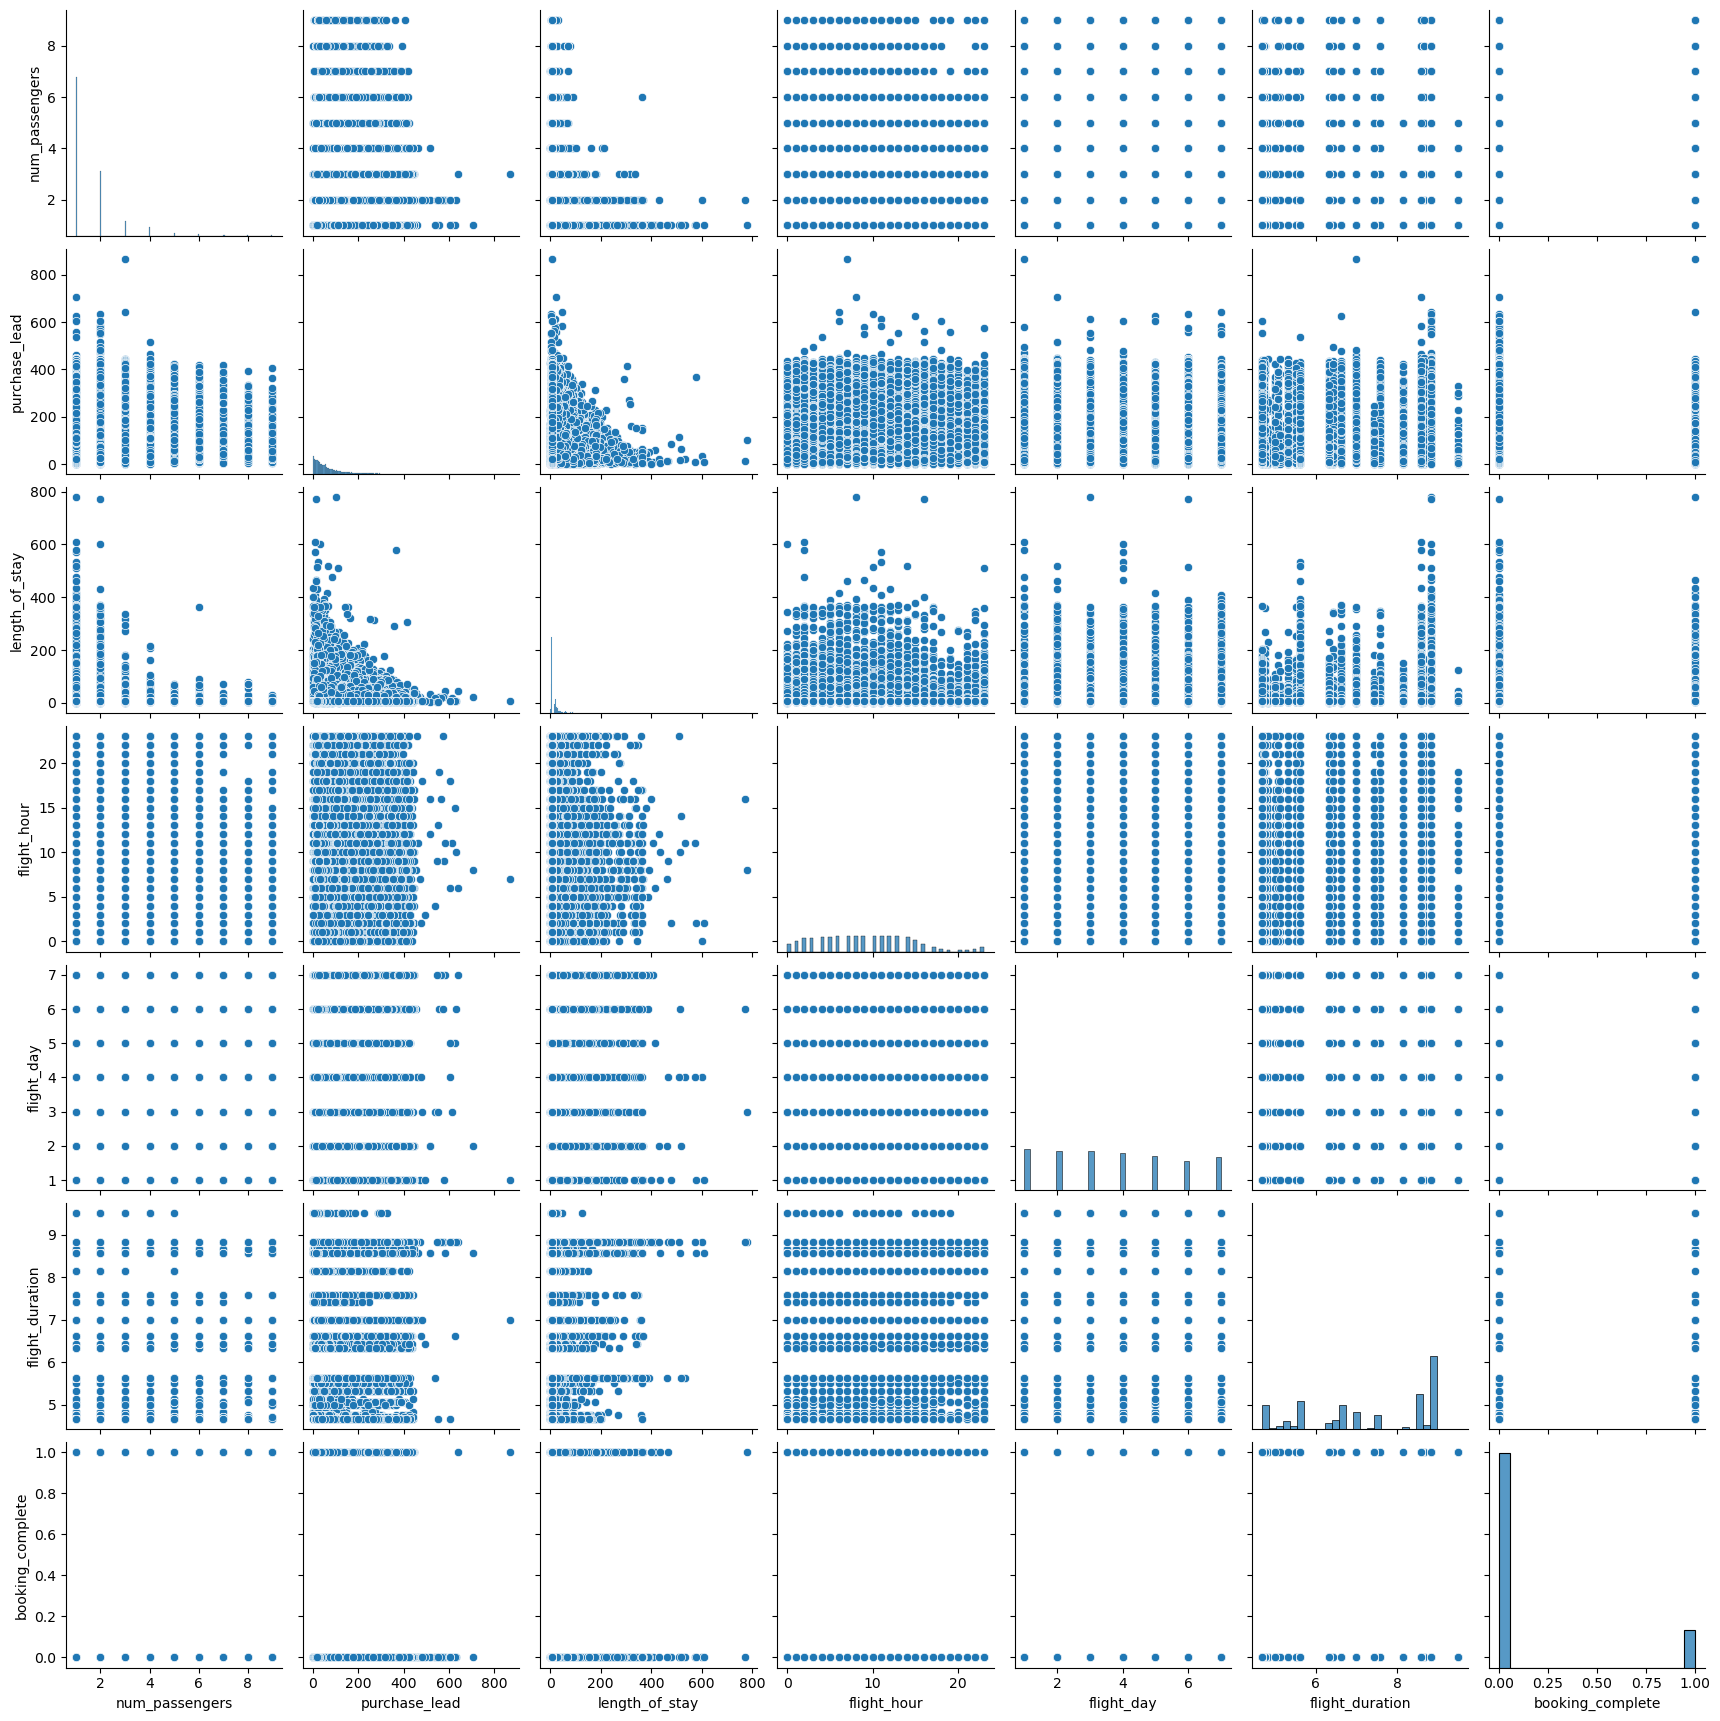

In [13]:
sns.pairplot(df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration', 'booking_complete']])
plt.show()


In [ ]:
correlation_matrix = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration', 'booking_complete']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['length_of_stay'], bins=30, kde=True, color='orange')
plt.xlabel('Length of Stay')
plt.ylabel('Count')
plt.title('Distribution of Length of Stay')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['flight_duration'], bins=30, kde=True, color='green')
plt.xlabel('Flight Duration')
plt.ylabel('Count')
plt.title('Distribution of Flight Duration')
plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(df['booking_complete'], palette='Blues')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Distribution of Booking Complete')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='flight_day', y='num_passengers', palette='magma')
plt.xlabel('Flight Day (Numeric)')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Variation for Each Day')
plt.show()


# Step 2: Data Preparation for Predictive Modeling

## 1. Handle Missing Values (if any)

If there are missing values in your dataset, you need to decide on an appropriate strategy to handle them. Common approaches include:
- Imputation: Fill missing values with the mean, median, or mode of the respective column.
- Removal: Remove rows or columns with missing values.

Here's an example of how to perform imputation using the mean:

```python
# Assuming 'df' is your DataFrame with the data
# Replace 'column_name' with the name of the column containing missing values
mean_value = df['column_name'].mean()
df['column_name'].fillna(mean_value, inplace=True)


In [17]:
from sklearn.model_selection import train_test_split

# Replace 'booking_complete' with the name of your target variable
y = df['booking_complete']

# Select the features (X), excluding the target variable and any irrelevant columns
# Replace 'selected_columns' with the names of columns you want to use as features
X = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']]

# Split the data into 80% training set and 20% testing set (adjust test_size as needed)
# Set a random seed for reproducibility (random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Step 3: Train Predictive Model and Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Initialize and Train the Model

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

## 2. Make Predictions

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

## 3. Evaluate the Model

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 2.229904742907906e-31
R-squared (R2): 1.0


## Other Experimental Attempts on Modelling


In [20]:
correlation_with_target = df.corr()['booking_complete'].sort_values(ascending=False)
print(correlation_with_target)


booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
flight_day              -0.006986
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_duration         -0.106266
Name: booking_complete, dtype: float64


C:\Users\balas\AppData\Local\Temp\ipykernel_21788\3039208292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['booking_complete'].sort_values(ascending=False)


C:\Users\balas\AppData\Local\Temp\ipykernel_21788\3266397620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_all = df.corr()


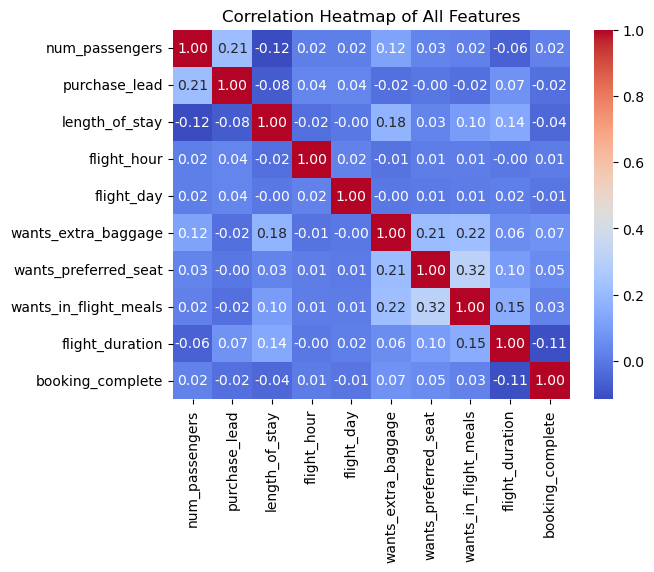

In [21]:
correlation_matrix_all = df.corr()
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()


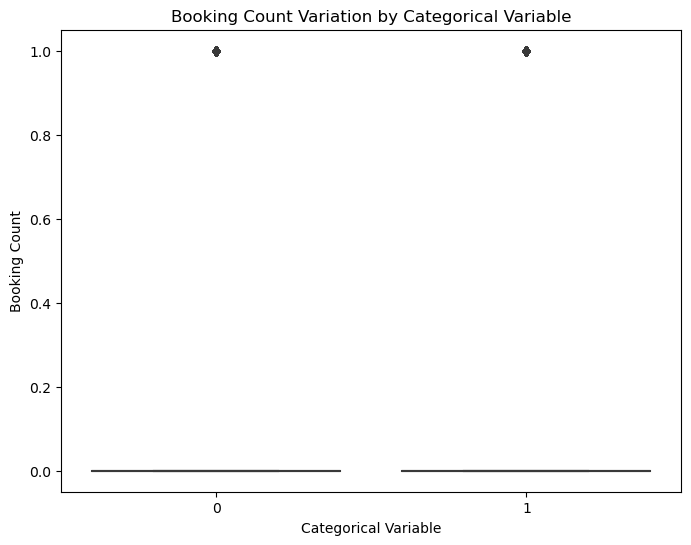

In [23]:
# Replace 'categorical_column' with the name of your categorical column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='wants_extra_baggage', y='booking_complete', palette='viridis')
plt.xlabel('Categorical Variable')
plt.ylabel('Booking Count')
plt.title('Booking Count Variation by Categorical Variable')
plt.show()


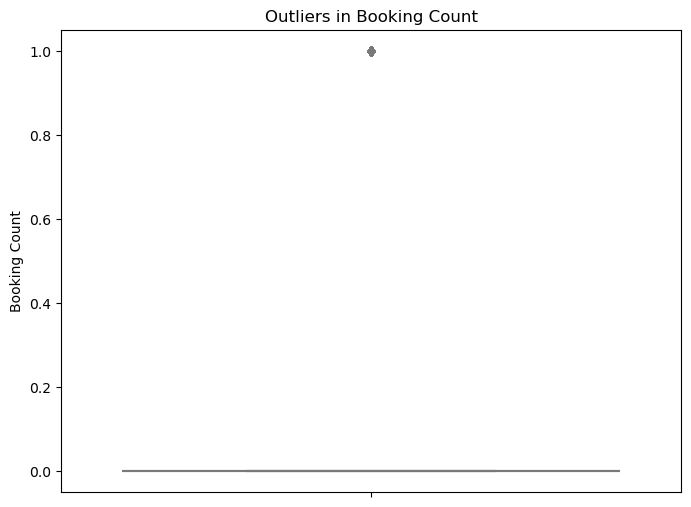

In [24]:
# Replace 'booking_count' with any other numeric feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='booking_complete', color='lightblue')
plt.ylabel('Booking Count')
plt.title('Outliers in Booking Count')
plt.show()


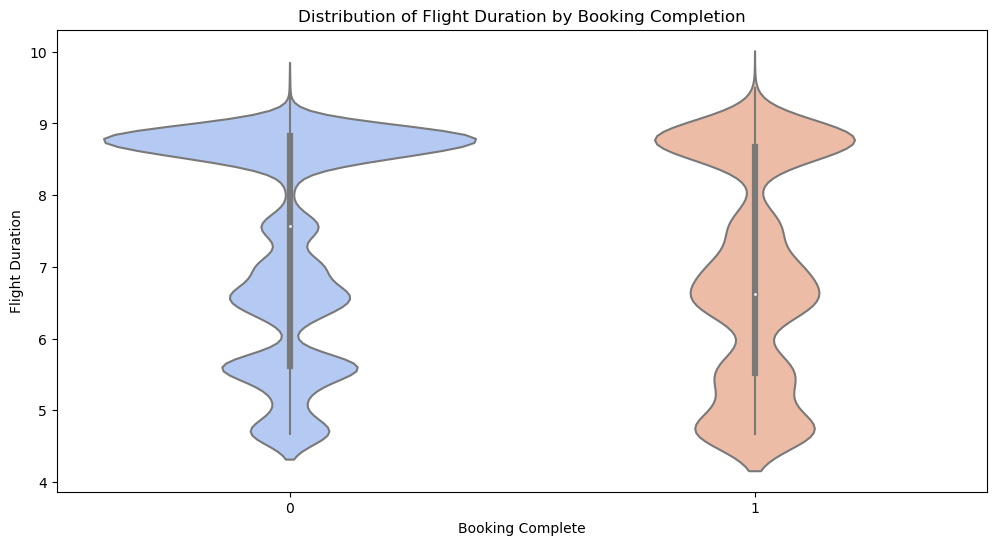

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='booking_complete', y='flight_duration', palette='coolwarm')
plt.xlabel('Booking Complete')
plt.ylabel('Flight Duration')
plt.title('Distribution of Flight Duration by Booking Completion')
plt.show()


### Scenario 1: Impact of 'flight_day' on 'booking_count'

We can perform an analysis of variance (ANOVA) test to investigate whether the day of the week (flight_day) has a significant impact on the booking count

In [27]:
from scipy.stats import f_oneway

# Separate 'booking_count' for each day of the week
grouped_data = [df[df['flight_day'] == day]['booking_complete'] for day in df['flight_day'].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The day of the week has a significant impact on booking count.")
else:
    print("The day of the week does not have a significant impact on booking count.")


ANOVA results:
F-statistic: 2.6851780711386963
p-value: 0.013180120659143818
The day of the week has a significant impact on booking count.


### Scenario 2: Impact of 'num_passengers' on 'booking_count'

We can perform a linear regression analysis to investigate the relationship between the number of passengers (num_passengers) and the booking count.

In [28]:
import statsmodels.api as sm

# Add a constant term to the features for the regression model
X_train_with_const = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       booking_complete   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.039e+32
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:18:21   Log-Likelihood:             1.3065e+06
No. Observations:               40000   AIC:                        -2.613e+06
Df Residuals:                   39989   BIC:                        -2.613e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.594e-

#### Scenario 3: Impact of 'wants_extra_baggage' on 'booking_count'

We'll perform a t-test to determine if there is a significant difference in booking count between customers who want extra baggage (wants_extra_baggage = 1) and customers who don't (wants_extra_baggage = 0).

In [31]:
from scipy.stats import ttest_ind

# Separate 'booking_count' for customers with and without extra baggage
booking_complete_extra_baggage = df[df['wants_extra_baggage'] == 1]['booking_complete']
booking_complete_no_extra_baggage = df[df['wants_extra_baggage'] == 0]['booking_complete']

# Perform t-test
t_statistic, p_value = ttest_ind(booking_complete_extra_baggage, booking_complete_no_extra_baggage)

print("T-test results:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in booking count between customers with and without extra baggage.")
else:
    print("There is no significant difference in booking count between customers with and without extra baggage.")


T-test results:
T-statistic: 15.271422065331162
p-value: 1.5584330370651752e-52
There is a significant difference in booking count between customers with and without extra baggage.


#### Scenario 4: Impact of 'flight_hour' on 'booking_count'

We'll perform a regression analysis to investigate the relationship between the flight hour (flight_hour) and the booking count. Since flight_hour is a continuous variable, we'll use a simple linear regression.

In [32]:
# Perform linear regression analysis
X_train_flight_hour = X_train[['flight_hour']]
X_train_flight_hour_with_const = sm.add_constant(X_train_flight_hour)
model_flight_hour = sm.OLS(y_train, X_train_flight_hour_with_const).fit()

# Get the summary of the regression model
print(model_flight_hour.summary())


                            OLS Regression Results                            
Dep. Variable:       booking_complete   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.830
Date:                Tue, 25 Jul 2023   Prob (F-statistic):             0.0926
Time:                        11:22:36   Log-Likelihood:                -15558.
No. Observations:               40000   AIC:                         3.112e+04
Df Residuals:                   39998   BIC:                         3.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1449      0.003     41.596      

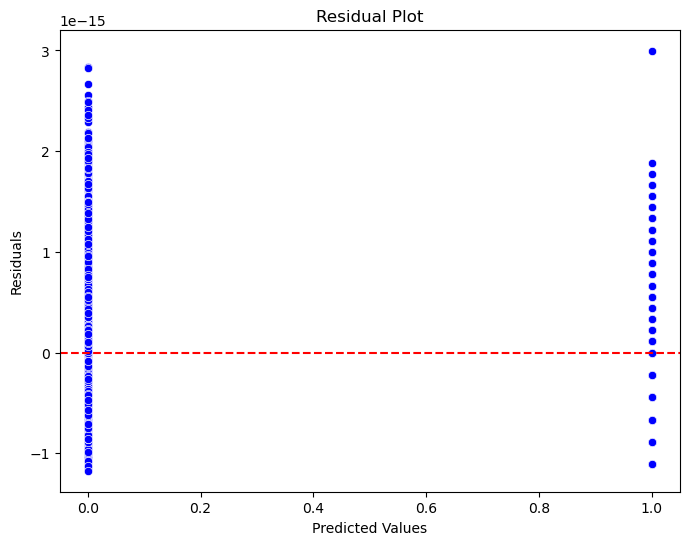

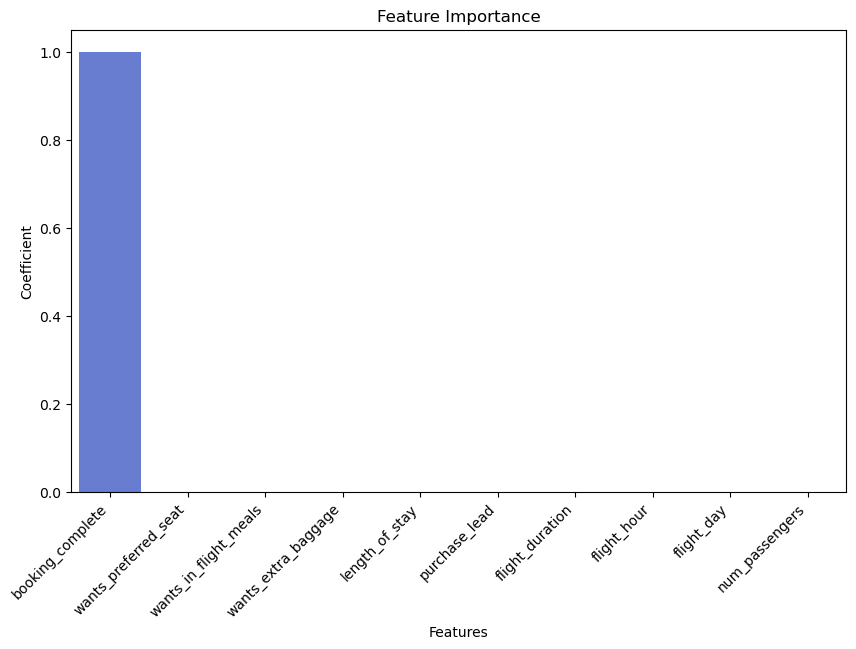

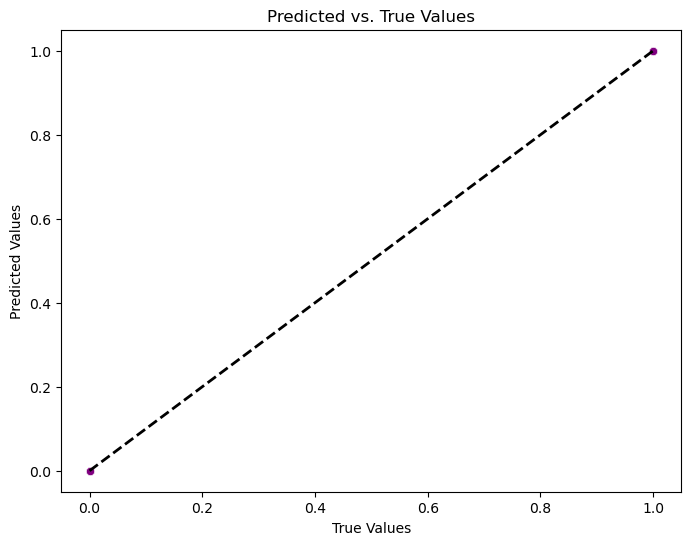

In [35]:
# Step 5: Visualizations for Model Interpretation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Residual Plot
# Assuming y_test and y_pred are available from Step 3
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## 2. Feature Importance
# Fit a new Linear Regression model for feature importance visualization
model_feature_importance = LinearRegression()
model_feature_importance.fit(X_train, y_train)

# Get the feature coefficients and create a Series
feature_importance = pd.Series(model_feature_importance.coef_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importance")
plt.show()

## 3. Predicted vs. True Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.show()
